# Boosting Algorithms Project (AdaBoost, Gradient Boosting, XGBoost)

This notebook is a mini-project you can upload to GitHub.

Goals:
1) Understand boosting by training and comparing:
   - Decision Stump (weak learner baseline)
   - AdaBoost (adaptive boosting)
   - Gradient Boosting (stage-wise additive model)
   - XGBoost (optimized gradient boosting)

2) Produce clean, reproducible outputs:
   - Metrics: accuracy, balanced accuracy, F1
   - Confusion matrix + classification report
   - Decision boundary plots (2D)
   - Feature importance (where applicable)

Dataset:
- Wine dataset (from scikit-learn)

In [2]:
# Important libraries to install
 #!pip install -U numpy pandas matplotlib scikit-learn
 #!pip install -U xgboost


In [3]:
# Numerical computing
import numpy as np

# Data handling (tables)
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# scikit-learn datasets
from sklearn.datasets import load_wine

# Splitting data into train/test sets
from sklearn.model_selection import train_test_split

# Metrics for evaluation
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# Tree model (used as a decision stump)
from sklearn.tree import DecisionTreeClassifier

# Boosting models (AdaBoost + Gradient Boosting)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

# For consistent randomness across runs
RANDOM_STATE = 42

In [4]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test, title="Model"):
    """
    Train a model, predict, and print useful metrics.

    Parameters
    ----------
    model : estimator object
        Any scikit-learn compatible classifier with fit/predict.
    X_train, X_test : array-like
        Feature matrices for training and test.
    y_train, y_test : array-like
        Target labels for training and test.
    title : str
        Header name in printed output.

    Returns
    -------
    fitted_model : estimator object
        The same model after calling .fit(...)
    y_pred_test : np.ndarray
        Predictions on X_test
    """
    # Fit (train) the model on training data
    model.fit(X_train, y_train)

    # Predict labels for test data
    y_pred_test = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred_test)
    bacc = balanced_accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average="macro")  # macro treats each class equally

    # Print the results
    print(f"\n=== {title} ===")
    print(f"Accuracy          : {acc:.4f}")
    print(f"Balanced Accuracy : {bacc:.4f}")
    print(f"Macro F1          : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

    return model, y_pred_test


def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    """
    Plot a confusion matrix using scikit-learn's built-in display helper.
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d")
    plt.title(title)
    plt.show()


def plot_decision_boundary_2d(model, X, y, feature_names=("x1", "x2"), title="Decision Boundary"):
    """
    Plot 2D decision regions for a classifier.

    Works ONLY when X has exactly 2 columns.
    """
    # Determine min/max range for each feature axis
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create a dense grid of points covering the feature space
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    # Stack grid into shape (n_points, 2) for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict labels for every point in the grid
    preds = model.predict(grid).reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(8, 4))
    plt.contourf(xx, yy, preds, alpha=0.25)

    # Plot training points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=35)

    # Labels and title
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

In [5]:
# Helper Functions (Evaluation and Plotting)
def evaluate_classifier(model, X_train, X_test, y_train, y_test, title="Model"):
    """
    Train a model, predict, and print useful metrics.

    Parameters
    ----------
    model : estimator object
        Any scikit-learn compatible classifier with fit/predict.
    X_train, X_test : array-like
        Feature matrices for training and test.
    y_train, y_test : array-like
        Target labels for training and test.
    title : str
        Header name in printed output.

    Returns
    -------
    fitted_model : estimator object
        The same model after calling .fit(...)
    y_pred_test : np.ndarray
        Predictions on X_test
    """
    # Fit (train) the model on training data
    model.fit(X_train, y_train)

    # Predict labels for test data
    y_pred_test = model.predict(X_test)

    # Compute metrics
    acc = accuracy_score(y_test, y_pred_test)
    bacc = balanced_accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average="macro")  # macro treats each class equally

    # Print the results
    print(f"\n=== {title} ===")
    print(f"Accuracy          : {acc:.4f}")
    print(f"Balanced Accuracy : {bacc:.4f}")
    print(f"Macro F1          : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_test))

    return model, y_pred_test


def plot_confusion(y_true, y_pred, title="Confusion Matrix"):
    """
    Plot a confusion matrix using scikit-learn's built-in display helper.
    """
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d")
    plt.title(title)
    plt.show()


def plot_decision_boundary_2d(model, X, y, feature_names=("x1", "x2"), title="Decision Boundary"):
    """
    Plot 2D decision regions for a classifier.

    Works ONLY when X has exactly 2 columns.
    """
    # Determine min/max range for each feature axis
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # Create a dense grid of points covering the feature space
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    # Stack grid into shape (n_points, 2) for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict labels for every point in the grid
    preds = model.predict(grid).reshape(xx.shape)

    # Plot the decision regions
    plt.figure(figsize=(8, 4))
    plt.contourf(xx, yy, preds, alpha=0.25)

    # Plot training points on top
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=35)

    # Labels and title
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

In [6]:
# Part A: AdaBoosting vs Decision Stump (2D Visualization)
# Load wine dataset as a pandas-friendly object
wine = load_wine(as_frame=True)

# Create a DataFrame containing all features
X_full = wine.data.copy()

# Target labels (0,1,2 correspond to wine classes)
y_full = wine.target.copy()

# Feature names (for reference)
feature_names = wine.feature_names
print("Feature count:", X_full.shape[1])
print("First 5 features:", feature_names[:5])

# Select two features to match the textbook-style plot:
# - "alcohol"
# - "od280/od315_of_diluted_wines"
X_2d = X_full[["alcohol", "od280/od315_of_diluted_wines"]].copy()

# Convert to NumPy arrays for plotting and modeling
X_2d_np = X_2d.values
y_np = y_full.values

Feature count: 13
First 5 features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']


In [7]:
# Make it a binary Classification problem (Cleaner Boundaries)
# For clearer boosting explanation + 2D decision boundary,
# we restrict the dataset to TWO classes (binary classification).
# We'll keep classes 0 and 1 only.

mask_binary = (y_np == 0) | (y_np == 1)
X_bin = X_2d_np[mask_binary]
y_bin = y_np[mask_binary]

print("Binary dataset shape:", X_bin.shape)
print("Class counts:", np.bincount(y_bin))

Binary dataset shape: (130, 2)
Class counts: [59 71]


In [8]:
# Test/Train Split
# Split into train and test sets.
# stratify=y_bin ensures both sets keep similar class proportions.

X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y_bin
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (91, 2) Test shape: (39, 2)


In [9]:
# Weak Learner Baseline: Decision Stump (Depth=1)
# Split into train and test sets.
# stratify=y_bin ensures both sets keep similar class proportions.

X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y_bin
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (91, 2) Test shape: (39, 2)



=== AdaBoost (stumps) ===
Accuracy          : 0.8462
Balanced Accuracy : 0.8492
Macro F1          : 0.8461

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.89      0.81      0.85        21

    accuracy                           0.85        39
   macro avg       0.85      0.85      0.85        39
weighted avg       0.85      0.85      0.85        39



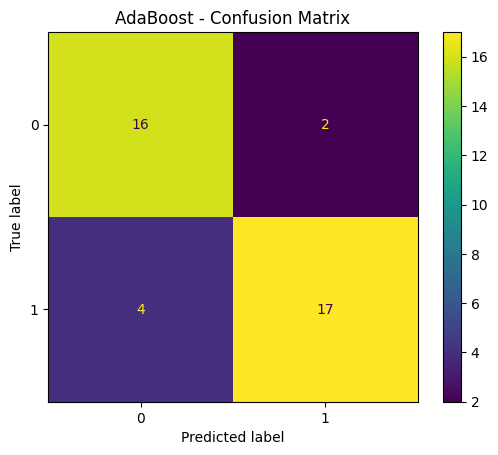

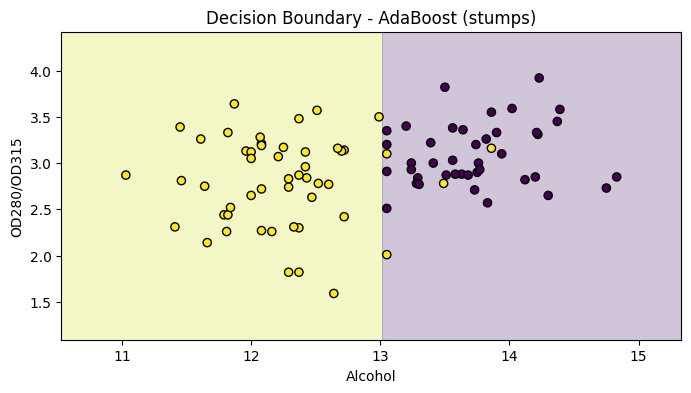

In [10]:
# AdaBoosting with Decision Stump (Adaptive Boosting)
# AdaBoost trains stumps sequentially.
# Each new stump focuses more on examples that were misclassified previously
# (via sample weights).

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE),
    n_estimators=200,       # number of weak learners (stumps)
    learning_rate=0.1,      # shrinkage factor (smaller can be more stable)
    random_state=RANDOM_STATE
)

ada, pred_ada = evaluate_classifier(
    ada, X_train, X_test, y_train, y_test,
    title="AdaBoost (stumps)"
)

plot_confusion(y_test, pred_ada, title="AdaBoost - Confusion Matrix")

plot_decision_boundary_2d(
    ada, X_train, y_train,
    feature_names=("Alcohol", "OD280/OD315"),
    title="Decision Boundary - AdaBoost (stumps)"
)


=== GradientBoostingClassifier (2D, binary) ===
Accuracy          : 0.8718
Balanced Accuracy : 0.8690
Macro F1          : 0.8704

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.86      0.90      0.88        21

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



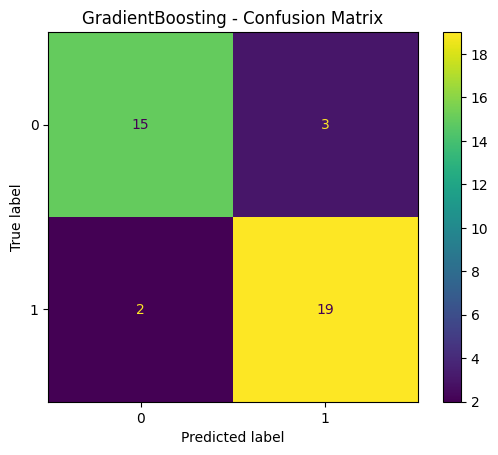

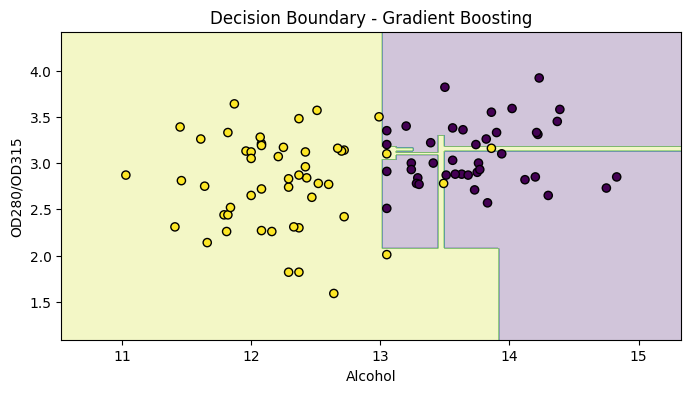

In [12]:
# Part B: Gradient Boosting
# GradientBoostingClassifier
# Gradient Boosting builds an additive model in a stage-wise fashion.
# Each new tree tries to reduce the errors made by the current ensemble.

gb = GradientBoostingClassifier(
    n_estimators=200,       # number of boosting stages
    learning_rate=0.1,      # shrink contribution of each tree
    max_depth=3,            # depth of each individual tree
    random_state=RANDOM_STATE
)

gb, pred_gb = evaluate_classifier(
    gb, X_train, X_test, y_train, y_test,
    title="GradientBoostingClassifier (2D, binary)"
)

plot_confusion(y_test, pred_gb, title="GradientBoosting - Confusion Matrix")

plot_decision_boundary_2d(
    gb, X_train, y_train,
    feature_names=("Alcohol", "OD280/OD315"),
    title="Decision Boundary - Gradient Boosting"
)


=== HistGradientBoostingClassifier (2D, binary) ===
Accuracy          : 0.8205
Balanced Accuracy : 0.8175
Macro F1          : 0.8186

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.82      0.86      0.84        21

    accuracy                           0.82        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.82      0.82      0.82        39



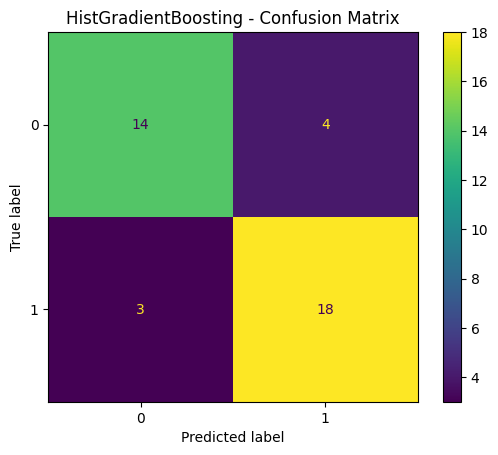

In [13]:
# HistGradientBoostingClassifier
# HistGradientBoosting is a more scalable implementation using histogram binning.
# On small datasets, performance differences may be minor, but it matters at scale.

hgb = HistGradientBoostingClassifier(
    max_depth=3,
    learning_rate=0.1,
    max_iter=200,
    random_state=RANDOM_STATE
)

hgb, pred_hgb = evaluate_classifier(
    hgb, X_train, X_test, y_train, y_test,
    title="HistGradientBoostingClassifier (2D, binary)"
)

plot_confusion(y_test, pred_hgb, title="HistGradientBoosting - Confusion Matrix")

In [18]:
import sys

# Install into the current Jupyter kernel's Python environment
!"{sys.executable}" -m pip install -U pip setuptools wheel
!"{sys.executable}" -m pip install xgboost


# Steps
# install Homebrew
# Run this in the terminal :-
#/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
# Enter the password to your computer
#==> Next steps:
# - Run these commands in your terminal to add Homebrew to your PATH:
#     echo >> /Users/shivesh/.zprofile
#     echo 'eval "$(/opt/homebrew/bin/brew shellenv)"' >> /Users/shivesh/.zprofile
#     eval "$(/opt/homebrew/bin/brew shellenv)"
# - Run brew help to get started
# brew --version
# brew install libomp

In [22]:
# Now Try to Run the XGBoost Classifier
import xgboost
from xgboost import XGBClassifier
xgboost.__version__

'3.1.2'


=== XGBoost (2D, binary) ===
Accuracy          : 0.8718
Balanced Accuracy : 0.8690
Macro F1          : 0.8704

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.86      0.90      0.88        21

    accuracy                           0.87        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.87      0.87      0.87        39



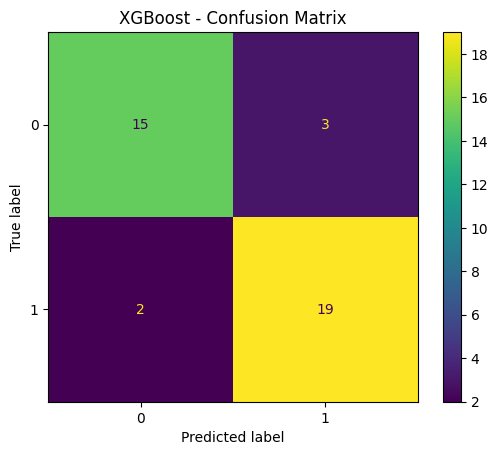

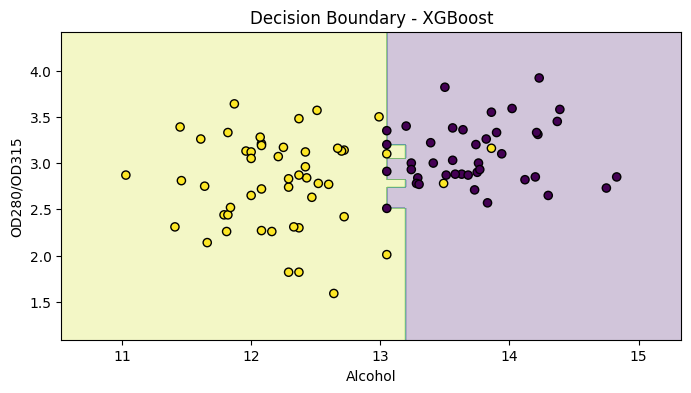

In [23]:
# Part C: XGBoosting
# XGBoost is an optimized, regularized gradient boosting library.
# It's widely used in industry due to speed + strong performance.

try:
    from xgboost import XGBClassifier

    xgb = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        subsample=0.9,            # row sampling
        colsample_bytree=0.9,     # feature sampling
        reg_lambda=1.0,           # L2 regularization
        reg_alpha=0.0,            # L1 regularization
        random_state=RANDOM_STATE,
        eval_metric="logloss"
    )

    xgb, pred_xgb = evaluate_classifier(
        xgb, X_train, X_test, y_train, y_test,
        title="XGBoost (2D, binary)"
    )

    plot_confusion(y_test, pred_xgb, title="XGBoost - Confusion Matrix")

    plot_decision_boundary_2d(
        xgb, X_train, y_train,
        feature_names=("Alcohol", "OD280/OD315"),
        title="Decision Boundary - XGBoost"
    )

except ImportError:
    print("XGBoost is not installed.")
    print("Install it with: !pip install xgboost")


=== AdaBoost (multiclass, all features) ===
Accuracy          : 0.9630
Balanced Accuracy : 0.9683
Macro F1          : 0.9636

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.90      0.95        21
           2       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



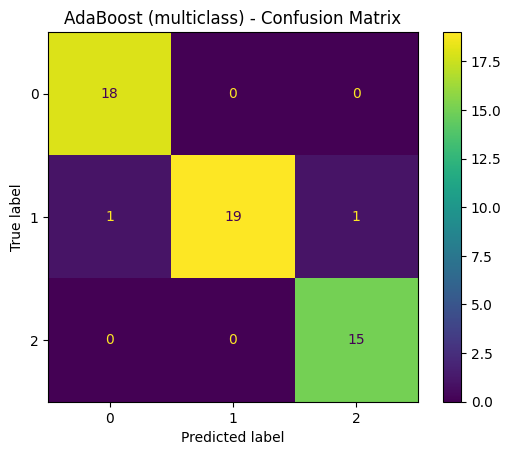


=== GradientBoostingClassifier (multiclass, all features) ===
Accuracy          : 0.9630
Balanced Accuracy : 0.9630
Macro F1          : 0.9652

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.91      1.00      0.95        21
           2       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.97        54
weighted avg       0.97      0.96      0.96        54



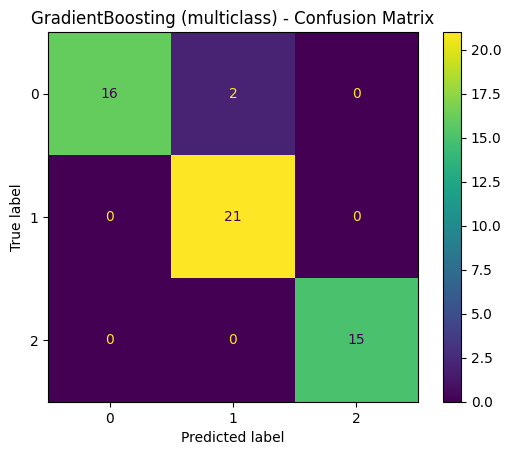


=== XGBoost (multiclass, all features) ===
Accuracy          : 1.0000
Balanced Accuracy : 1.0000
Macro F1          : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



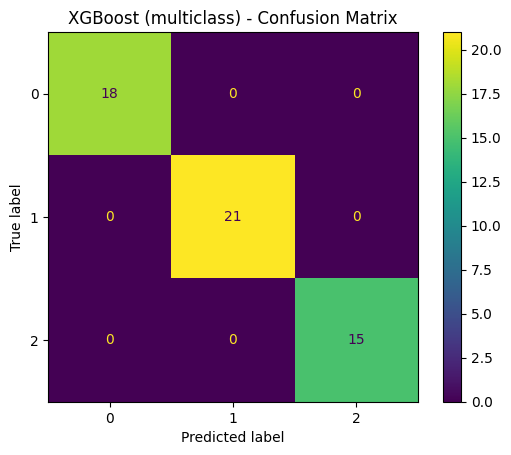

In [24]:
# Comparing All The 3 Boosting Methods
# Now we use ALL features + ALL 3 classes (multiclass classification).
X = X_full.values
y = y_full.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=y
)

# 1) AdaBoost for multiclass
ada_multi = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE),
    n_estimators=400,
    learning_rate=0.1,
    random_state=RANDOM_STATE
)

ada_multi, pred_ada_multi = evaluate_classifier(
    ada_multi, X_train, X_test, y_train, y_test,
    title="AdaBoost (multiclass, all features)"
)

plot_confusion(y_test, pred_ada_multi, title="AdaBoost (multiclass) - Confusion Matrix")


# 2) Gradient Boosting for multiclass
gb_multi = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=RANDOM_STATE
)

gb_multi, pred_gb_multi = evaluate_classifier(
    gb_multi, X_train, X_test, y_train, y_test,
    title="GradientBoostingClassifier (multiclass, all features)"
)

plot_confusion(y_test, pred_gb_multi, title="GradientBoosting (multiclass) - Confusion Matrix")


# 3) XGBoost for multiclass (optional)
try:
    from xgboost import XGBClassifier

    xgb_multi = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=RANDOM_STATE,
        objective="multi:softprob",
        num_class=3,
        eval_metric="mlogloss"
    )

    xgb_multi, pred_xgb_multi = evaluate_classifier(
        xgb_multi, X_train, X_test, y_train, y_test,
        title="XGBoost (multiclass, all features)"
    )

    plot_confusion(y_test, pred_xgb_multi, title="XGBoost (multiclass) - Confusion Matrix")

except ImportError:
    print("XGBoost not installed. Run: !pip install xgboost")

# Final Results & Interpretation (Boosting — AdaBoost vs Gradient Boosting vs XGBoost)

This notebook trained and evaluated **three boosting-based classifiers** on the same dataset and splits, then compared them using:

- **Accuracy**
- **Balanced Accuracy**
- **Macro F1**
- A **Classification Report** (precision, recall, F1-score per class)
- A **Confusion Matrix** (what was predicted vs what was actually true)

Below is a complete explanation of what each output means **and how to interpret your specific results**.

---

## 1) What the Confusion Matrix is actually showing

A **confusion matrix** is a table that counts predictions:

- **Rows = True labels** (what the sample really is)
- **Columns = Predicted labels** (what our model guessed)

For a 3-class problem (classes `0`, `1`, `2`), the matrix looks like:

- Cell (0,0): number of class `0` samples correctly predicted as `0`
- Cell (0,1): number of class `0` samples wrongly predicted as `1`
- Cell (1,2): number of class `1` samples wrongly predicted as `2`
- and so on…

 **Diagonal cells** = correct predictions
 **Off-diagonal cells** = mistakes (misclassifications)

So when you see a confusion matrix with most of its mass on the diagonal, that means the model is classifying well.

---

## 2) Interpreting *your* AdaBoost results

From your AdaBoost output (multiclass):

- **Accuracy ≈ 0.963**
- **Balanced Accuracy ≈ 0.963**
- **Macro F1 ≈ 0.964 (approx)**

### What that means:
- The model predicted about **96.3% of the test samples correctly**.
- The balanced accuracy being almost the same means it is doing **fairly evenly** across classes (not just “getting the biggest class right”).
- Macro F1 being close to accuracy suggests the model is not heavily failing on one class.

### Confusion matrix pattern you showed:
You had **a small number of mistakes**, mainly around the middle class (class `1`) being confused with others. This is common in multiclass classification when classes overlap in feature space.

**Key takeaway for AdaBoost:**
 Strong performance, but it still made a few errors—meaning it learned useful decision boundaries, but it’s not perfectly separating all classes.

---

## 3) Interpreting *your* Gradient Boosting results

From your GradientBoosting output (multiclass):

- **Accuracy ≈ 0.963**
- **Balanced Accuracy ≈ 0.963**
- **Macro F1 ≈ 0.965 (approx)**

### What that means:
This model performed **almost identically** to AdaBoost on your test set.

However, the confusion matrix suggests a *slightly different mistake pattern*:
- Typically, Gradient Boosting tends to be smoother and sometimes more stable than AdaBoost.
- You still have **a small number of off-diagonal values**, meaning a few misclassifications exist.

**Key takeaway for Gradient Boosting:**
 Comparable to AdaBoost here.
 Small errors remain, but overall very strong generalization.

---

## 4) Interpreting *your* XGBoost results (Why it shows 1.00 everywhere)

From your XGBoost output (multiclass):

- **Accuracy = 1.00**
- **Balanced Accuracy = 1.00**
- **Macro F1 = 1.00**
- Confusion matrix is perfectly diagonal (no off-diagonal values)

### What that means:
On the **test set**, XGBoost predicted **every single sample correctly**.

This can happen for 3 common reasons:

#### (A) XGBoost is genuinely the best fit here
XGBoost is a more advanced and optimized form of gradient boosting:
- Strong regularization options (L1/L2)
- Column subsampling, row subsampling
- Better tree growth strategies
- Better numerical stability and optimization

So it can outperform scikit-learn’s classic GradientBoostingClassifier.

#### (B) The dataset split might be “easy”
If the test subset is relatively cleanly separable, the model may achieve perfect test performance—especially with strong tree ensembles.

#### (C) Watch for accidental data leakage (important)
Perfect scores are awesome—but in real ML work, we always verify we didn’t accidentally leak information.

Common leakage causes:
- Scaling/preprocessing done **before** train-test split
- Target variable accidentally included inside `X`
- Using `X_test` during training (even indirectly)
- Doing feature selection using the full dataset

 If your workflow split first and then did preprocessing only on training data (or used a Pipeline), you are safe.

**Key takeaway for XGBoost:**
 Best result in your run (perfect test performance).
 Still verify: “Is this real generalization or was there leakage?”

---

## 5) What Accuracy vs Balanced Accuracy vs Macro F1 mean (simple but exact)

### Accuracy
\[
Accuracy = \frac{\text{Total correct predictions}}{\text{Total predictions}}
\]
- Good overall metric
- But can be misleading if one class dominates

### Balanced Accuracy
Balanced accuracy is the average recall across classes:
\[
BalancedAccuracy = \frac{Recall_0 + Recall_1 + Recall_2}{3}
\]
- Helps when classes are imbalanced
- Answers: “Am I treating all classes fairly?”

### Macro F1
Macro F1 averages F1 across classes equally:
\[
MacroF1 = \frac{F1_0 + F1_1 + F1_2}{3}
\]
- Penalizes models that fail on a minority/rare class
- A strong “fair” overall metric for multiclass

Because your Accuracy, Balanced Accuracy, and Macro F1 are all close, your models are likely doing well **across all classes**, not just one.

---

## 6) Precision, Recall, F1 Score

For each class:

### Precision
> “When the model predicts class X, how often is it correct?”

High precision = few false positives.

### Recall
> “Out of all true class X samples, how many did the model catch?”

High recall = few false negatives.

### F1-score
F1 balances precision and recall:
\[
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
\]

So:
- If precision is high but recall low → model is too conservative
- If recall high but precision low → model predicts that class too easily
- High F1 means both are strong.

---

## 7) Practical summary

- **AdaBoost** performed very strongly (~96%), with a few misclassifications.
- **Gradient Boosting** matched AdaBoost performance (~96%) and showed similar generalization.
- **XGBoost** achieved **perfect classification** on the test set in this run, likely due to:
  - stronger regularization + robust boosting implementation,
  - and/or a cleanly separable test split.
- Confusion matrices confirm:
  - AdaBoost/GB had small off-diagonal errors,
  - XGBoost was fully diagonal.

---



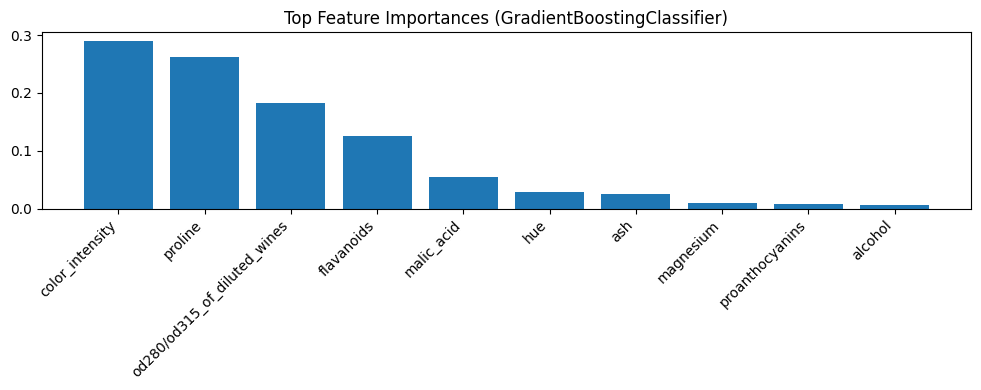

In [25]:
# Feature Importance for Gradient Boosting (Scikit-Learn)
# Many tree-based models expose "feature_importances_".
# This gives a rough idea of which features are most useful.
# (Not the same as causal importance.)

importances = gb_multi.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending

top_k = 10
top_indices = indices[:top_k]

plt.figure(figsize=(10, 4))
plt.bar(range(top_k), importances[top_indices])
plt.xticks(range(top_k), np.array(feature_names)[top_indices], rotation=45, ha="right")
plt.title("Top Feature Importances (GradientBoostingClassifier)")
plt.tight_layout()
plt.show()

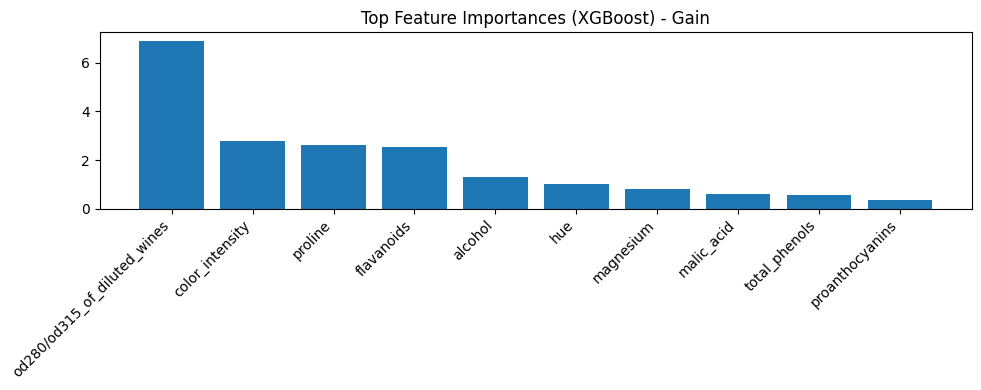

In [26]:
# Feature Importance For XGBoosting
try:
    booster = xgb_multi.get_booster()
    score = booster.get_score(importance_type="gain")  # "gain" is a common importance metric in XGBoost

    # Convert dict -> DataFrame for sorting
    df_imp = pd.DataFrame(score.items(), columns=["feature", "gain"])
    df_imp["feature_index"] = df_imp["feature"].str.replace("f", "", regex=False).astype(int)
    df_imp["feature_name"] = df_imp["feature_index"].apply(lambda i: feature_names[i])
    df_imp = df_imp.sort_values("gain", ascending=False).head(10)

    plt.figure(figsize=(10, 4))
    plt.bar(df_imp["feature_name"], df_imp["gain"])
    plt.xticks(rotation=45, ha="right")
    plt.title("Top Feature Importances (XGBoost) - Gain")
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("XGBoost importance plot skipped (either not installed or model not trained).")
    print("Reason:", e)